In [1]:
import random
from datetime import datetime, timedelta
import time


# Event Class
class Event:
    def __init__(self, event_id, title, date, time, location):
        self.id = event_id
        self.title = title
        self.date = date
        self.time = time
        self.location = location
        self.timestamp = datetime.strptime(f"{date} {time}", "%Y-%m-%d %H:%M")

    def __repr__(self):
        return (f"Event({self.id}, '{self.title}', '{self.date}', '{self.time}', "
                f"'{self.location}', timestamp='{self.timestamp.strftime('%Y-%m-%d %H:%M')}')")



# Dynamic Array Implementation

class EventArrayList:
    def __init__(self):
        self.capacity = 4
        self.size = 0
        self.events = [None] * self.capacity

    def insert(self, event):
        if self.size == self.capacity:
            self._resize()
        self.events[self.size] = event
        self.size += 1

    def _resize(self):
        new_capacity = self.capacity * 2
        new_events = [None] * new_capacity
        for i in range(self.size):
            new_events[i] = self.events[i]
        self.events = new_events
        self.capacity = new_capacity

    def delete(self, event_id):
        for i in range(self.size):
            if self.events[i].id == event_id:
                for j in range(i, self.size - 1):
                    self.events[j] = self.events[j + 1]
                self.events[self.size - 1] = None
                self.size -= 1
                return True
        return False

    def search_by_id(self, event_id):
        for i in range(self.size):
            if self.events[i].id == event_id:
                return self.events[i]
        return None

    def list_all(self):
        result = []
        for i in range(self.size):
            result.append(self.events[i])
        return result



# Singly Linked List Implementation

class Node:
    def __init__(self, event):
        self.event = event
        self.next = None

class EventLinkedList:
    def __init__(self):
        self.head = None

    def insert(self, event):
        new_node = Node(event)
        new_node.next = self.head
        self.head = new_node

    def delete(self, event_id):
        current = self.head
        prev = None
        while current:
            if current.event.id == event_id:
                if prev:
                    prev.next = current.next
                else:
                    self.head = current.next
                return True
            prev = current
            current = current.next
        return False

    def search_by_id(self, event_id):
        current = self.head
        while current:
            if current.event.id == event_id:
                return current.event
            current = current.next
        return None

    def list_all(self):
        result = []
        current = self.head
        while current:
            result.append(current.event)
            current = current.next
        return result


    def append(self, event):
        new_node = Node(event)
        if not self.head:
            self.head = new_node
            return
        temp = self.head
        while temp.next:
            temp = temp.next
        temp.next = new_node

    def to_list(self):
        events = []
        temp = self.head
        while temp:
            events.append(temp.event)
            temp = temp.next
        return events

    def from_list(self, events):
        self.head = None
        for e in events:
            self.append(e)


# Random Event Generator

def generate_random_events(n):
    titles = ["Hackathon", "Concert", "Seminar", "Exam", "Workshop", "Meetup"]
    locations = ["Auditorium", "Main Hall", "Room 101", "Lab A", "Cafeteria", "Library"]
    base_date = datetime(2025, 1, 1)

    events = []
    for i in range(n):
        title = random.choice(titles)
        date = (base_date + timedelta(days=random.randint(0, 365))).strftime("%Y-%m-%d")
        time = f"{random.randint(8, 20):02d}:{random.choice(['00','30'])}"
        location = random.choice(locations)
        events.append(Event(i, title, date, time, location))
    return events



# Demo Runner (prints results)

if __name__ == "__main__":
    print("\n--- DEMO: Array List ---")
    arr_store = EventArrayList()
    e1 = Event(1, "Hackathon", "2025-10-10", "10:00", "Auditorium")
    e2 = Event(2, "Concert", "2025-11-01", "19:00", "Main Hall")
    arr_store.insert(e1)
    arr_store.insert(e2)
    print("All events:", arr_store.list_all())
    print("Search ID 2:", arr_store.search_by_id(2))
    arr_store.delete(1)
    print("After deleting ID 1:", arr_store.list_all())

    print("\n--- DEMO: Linked List ---")
    link_store = EventLinkedList()
    link_store.insert(e1)
    link_store.insert(e2)
    print("All events:", link_store.list_all())
    print("Search ID 1:", link_store.search_by_id(1))
    link_store.delete(2)
    print("After deleting ID 2:", link_store.list_all())

    print("\n--- DEMO: Bulk Generation & Timing ---")
    for n in [50, 500, 5000]:
        events = generate_random_events(n)
        print(f"\nGenerated {n} events. First 3:")
        print(events[:3])

        # Benchmark insert into array
        arr_store = EventArrayList()
        start = time.time()
        for ev in events:
            arr_store.insert(ev)
        duration = time.time() - start
        print(f"Inserted {n} events into ArrayList in {duration:.4f} seconds")

        # Benchmark search in array
        start = time.time()
        arr_store.search_by_id(n-1)
        duration = time.time() - start
        print(f"Search for last ID in ArrayList took {duration:.6f} seconds")

        # Benchmark insert into linked list
        link_store = EventLinkedList()
        start = time.time()
        for ev in events:
            link_store.insert(ev)
        duration = time.time() - start
        print(f"Inserted {n} events into LinkedList in {duration:.4f} seconds")

        # Benchmark search in linked list
        start = time.time()
        link_store.search_by_id(n-1)
        duration = time.time() - start
        print(f"Search for last ID in LinkedList took {duration:.6f} seconds")


--- DEMO: Array List ---
All events: [Event(1, 'Hackathon', '2025-10-10', '10:00', 'Auditorium', timestamp='2025-10-10 10:00'), Event(2, 'Concert', '2025-11-01', '19:00', 'Main Hall', timestamp='2025-11-01 19:00')]
Search ID 2: Event(2, 'Concert', '2025-11-01', '19:00', 'Main Hall', timestamp='2025-11-01 19:00')
After deleting ID 1: [Event(2, 'Concert', '2025-11-01', '19:00', 'Main Hall', timestamp='2025-11-01 19:00')]

--- DEMO: Linked List ---
All events: [Event(2, 'Concert', '2025-11-01', '19:00', 'Main Hall', timestamp='2025-11-01 19:00'), Event(1, 'Hackathon', '2025-10-10', '10:00', 'Auditorium', timestamp='2025-10-10 10:00')]
Search ID 1: Event(1, 'Hackathon', '2025-10-10', '10:00', 'Auditorium', timestamp='2025-10-10 10:00')
After deleting ID 2: [Event(1, 'Hackathon', '2025-10-10', '10:00', 'Auditorium', timestamp='2025-10-10 10:00')]

--- DEMO: Bulk Generation & Timing ---

Generated 50 events. First 3:
[Event(0, 'Seminar', '2025-02-21', '17:00', 'Room 101', timestamp='2025-02

       N | Insertion Array (s) | Merge Array (s) | Quick Array (s) | Insertion LL (s) | Merge LL (s) | Quick LL (s)
---------------------------------------------------------------------------------------------------------
      50 |            0.00019 |         0.00621 |         0.02626 |         0.00012 |      0.00677 |      0.02778
     500 |            0.01438 |         0.12968 |         0.46336 |         0.00627 |      0.06271 |      0.26902
    5000 |            1.00770 |         0.97986 |         3.44795 |         0.65000 |      0.93740 |      5.21171


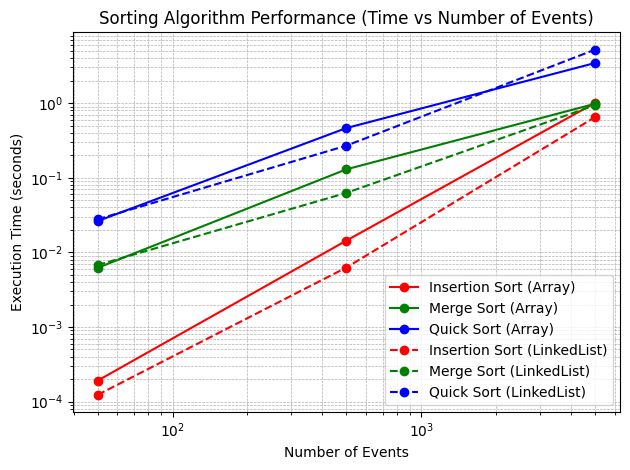


SORTED EVENT LIST TEST

Original Events (unsorted):
  Meetup           2025-02-27  08:30
  Concert          2025-03-13  19:00
  Meetup           2025-10-07  09:30
  Hackathon        2025-02-17  11:00
  Workshop         2025-01-14  16:00
  Meetup           2025-12-26  16:30
  Exam             2025-10-29  12:00
  Meetup           2025-08-05  13:30

ARRAY BASED SORTS

 Arr Insertion Sort:
  Workshop         2025-01-14  16:00
  Hackathon        2025-02-17  11:00
  Meetup           2025-02-27  08:30
  Concert          2025-03-13  19:00
  Meetup           2025-08-05  13:30
  Meetup           2025-10-07  09:30
  Exam             2025-10-29  12:00
  Meetup           2025-12-26  16:30

Arr Merge Sort:
  Workshop         2025-01-14  16:00
  Hackathon        2025-02-17  11:00
  Meetup           2025-02-27  08:30
  Concert          2025-03-13  19:00
  Meetup           2025-08-05  13:30
  Meetup           2025-10-07  09:30
  Exam             2025-10-29  12:00
  Meetup           2025-12-26  16:30



In [3]:
#PART B
import matplotlib.pyplot as plt
def event_key(event):
    return datetime.strptime(f"{event.date} {event.time}", "%Y-%m-%d %H:%M")


def insertion_sort_array(event_list):
    for i in range(1, event_list.size):
        key_event = event_list.events[i]
        key_value = key_event.timestamp
        j = i - 1
        while j >= 0 and event_list.events[j].timestamp > key_value:
            event_list.events[j + 1] = event_list.events[j]
            j -= 1
        event_list.events[j + 1] = key_event



def merge_sort_array(events):
    if len(events) <= 1:
        return events
    mid = len(events) // 2
    left = merge_sort_array(events[:mid])
    right = merge_sort_array(events[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if event_key(left[i]) <= event_key(right[j]):
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result


def quick_sort_array(events):
    if len(events) <= 1:
        return events
    pivot = events[len(events) // 2]
    left = [x for x in events if event_key(x) < event_key(pivot)]
    middle = [x for x in events if event_key(x) == event_key(pivot)]
    right = [x for x in events if event_key(x) > event_key(pivot)]
    return quick_sort_array(left) + middle + quick_sort_array(right)


#Linked List
def insertion_sort_linkedlist(ll):
    sorted_head = None
    current = ll.head
    while current:
        next_node = current.next
        sorted_head = sorted_insert_fast(sorted_head, current)
        current = next_node
    ll.head = sorted_head


def sorted_insert_fast(head, new_node):
    if not head or new_node.event.timestamp < head.event.timestamp:
        new_node.next = head
        return new_node

    current = head
    while current.next and current.next.event.timestamp < new_node.event.timestamp:
        current = current.next

    new_node.next = current.next
    current.next = new_node
    return head



def merge_sort_linkedlist(head):
    if not head or not head.next:
        return head
    middle = get_middle(head)
    next_to_middle = middle.next
    middle.next = None

    left = merge_sort_linkedlist(head)
    right = merge_sort_linkedlist(next_to_middle)

    return sorted_merge(left, right)

def sorted_merge(a,b):
    if not a:
        return b
    if not b:
        return a

    dummy = Node(None)
    tail = dummy

    while a and b:
        if event_key(a.event) <= event_key(b.event):
            tail.next = a
            a = a.next
        else:
            tail.next = b
            b = b.next
        tail = tail.next

    if a:
        tail.next = a
    elif b:
        tail.next = b

    return dummy.next



def get_middle(head):
    if not head:
        return head
    slow = head
    fast = head
    while fast.next and fast.next.next:
        slow = slow.next
        fast = fast.next.next
    return slow



def quick_sort_linkedlist(ll):
    events = ll.to_list()
    events = quick_sort_array(events)
    ll.from_list(events)


# Testing
#Test 1
def test_all_sorts_with_plot():
    sizes = [50, 500, 5000]

    # Store times for plotting
    times_insertion_array, times_merge_array, times_quick_array = [], [], []
    times_insertion_ll, times_merge_ll, times_quick_ll = [], [], []

    print(f"{'N':>8} | {'Insertion Array (s)':>18} | {'Merge Array (s)':>15} | {'Quick Array (s)':>15} | {'Insertion LL (s)':>15} | {'Merge LL (s)':>12} | {'Quick LL (s)':>12}")
    print("-" * 105)

    for n in sizes:
        events = generate_random_events(n)

        #Array Insertion Sort
        arr = EventArrayList()
        arr.events = events.copy()
        arr.size = n
        start = time.perf_counter()
        insertion_sort_array(arr)
        t_insertion_array = time.perf_counter() - start

        #Array Merge Sort
        start = time.perf_counter()
        merge_sort_array(events.copy())
        t_merge_array = time.perf_counter() - start

        #Array Quick Sort
        start = time.perf_counter()
        quick_sort_array(events.copy())
        t_quick_array = time.perf_counter() - start

        #Linked Insertion Sort
        ll = EventLinkedList()
        for e in events:
            ll.append(e)
        start = time.perf_counter()
        insertion_sort_linkedlist(ll)
        t_insertion_ll = time.perf_counter() - start

        #Linked Merge Sort
        ll2 = EventLinkedList()
        for e in events:
            ll2.append(e)
        start = time.perf_counter()
        ll2.head = merge_sort_linkedlist(ll2.head)
        t_merge_ll = time.perf_counter() - start

        #Linked Quick Sort
        ll3 = EventLinkedList()
        for e in events:
            ll3.append(e)
        start = time.perf_counter()
        quick_sort_linkedlist(ll3)
        t_quick_ll = time.perf_counter() - start


        times_insertion_array.append(t_insertion_array)
        times_merge_array.append(t_merge_array)
        times_quick_array.append(t_quick_array)
        times_insertion_ll.append(t_insertion_ll)
        times_merge_ll.append(t_merge_ll)
        times_quick_ll.append(t_quick_ll)

        print(f"{n:8d} | {t_insertion_array:18.5f} | {t_merge_array:15.5f} | {t_quick_array:15.5f} | {t_insertion_ll:15.5f} | {t_merge_ll:12.5f} | {t_quick_ll:12.5f}")


    plt.figure()
    plt.title("Sorting Algorithm Performance (Time vs Number of Events)")
    plt.plot(sizes, times_insertion_array, 'r-o', label='Insertion Sort (Array)')
    plt.plot(sizes, times_merge_array, 'g-o', label='Merge Sort (Array)')
    plt.plot(sizes, times_quick_array, 'b-o', label='Quick Sort (Array)')
    plt.plot(sizes, times_insertion_ll, 'r--o', label='Insertion Sort (LinkedList)')
    plt.plot(sizes, times_merge_ll, 'g--o', label='Merge Sort (LinkedList)')
    plt.plot(sizes, times_quick_ll, 'b--o', label='Quick Sort (LinkedList)')
    plt.xlabel("Number of Events")
    plt.ylabel("Execution Time (seconds)")
    plt.xscale("log")  # log-scale for clearer separation
    plt.yscale("log")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

#Test 2
def test_sorted_event_order():
    print("\nSORTED EVENT LIST TEST\n")
    random.seed(42)
    events = generate_random_events(8)

    print("Original Events (unsorted):")
    for e in events:
        print(f"  {e.title:<15}  {e.date}  {e.time}")

    print("\nARRAY BASED SORTS")

    #Array Insertion Sort
    arr1 = EventArrayList()
    arr1.events = events.copy()
    arr1.size = len(events)
    insertion_sort_array(arr1)
    print("\n Arr Insertion Sort:")
    for e in arr1.events:
        print(f"  {e.title:<15}  {e.date}  {e.time}")

    # Array Merge Sort
    sorted_merge = merge_sort_array(events.copy())
    print("\nArr Merge Sort:")
    for e in sorted_merge:
        print(f"  {e.title:<15}  {e.date}  {e.time}")

    #Array Quick Sort
    sorted_quick = quick_sort_array(events.copy())
    print("\n Arr Quick Sort:")
    for e in sorted_quick:
        print(f"  {e.title:<15}  {e.date}  {e.time}")

    print("\nLINKED LIST BASED SORTS")

    #Linked Insertion Sort
    ll1 = EventLinkedList()
    for e in events:
        ll1.append(e)
    insertion_sort_linkedlist(ll1)
    print("\n LL Insertion Sort:")
    for e in ll1.to_list():
        print(f"  {e.title:<15}  {e.date}  {e.time}")

    #Linked Merge Sort
    ll2 = EventLinkedList()
    for e in events:
        ll2.append(e)
    ll2.head = merge_sort_linkedlist(ll2.head)
    print("\nLL Merge Sort:")
    for e in ll2.to_list():
        print(f"  {e.title:<15}  {e.date}  {e.time}")

    #Linked Quick Sort
    ll3 = EventLinkedList()
    for e in events:
        ll3.append(e)
    quick_sort_linkedlist(ll3)
    print("\nLL Quick Sort:")
    for e in ll3.to_list():
        print(f"  {e.title:<15}  {e.date}  {e.time}")






# Run the Test

test_all_sorts_with_plot()
test_sorted_event_order()


In [ ]:
def conflict_detection_array(event_array, checked_date):
    sorted_events = merge_sort_array(event_array.list_all())
    same_day_events = []
    for event in sorted_events:
        if event.date == checked_date:
            same_day_events.append(event)

    # Overlapping events
    result = []
    for i in range(len(same_day_events)):
        for j in range(i + 1, len(same_day_events)):
            if same_day_events[i].time == same_day_events[j].time and same_day_events[i].location == same_day_events[j].location:
                result.append((same_day_events[i], same_day_events[j]))
    return result



In [ ]:
def conflict_detection_linkedlist(event_linkedlist, checked_date):
    event_linkedlist.head = merge_sort_linkedlist(event_linkedlist.head)

    sorted_events = event_linkedlist.to_list()

    same_day_events = []
    for event in sorted_events:
        if event.date == checked_date:
            same_day_events.append(event)

    # Overlapping events
    result = []
    for i in range(len(same_day_events)):
        for j in range(i + 1, len(same_day_events)):
            if same_day_events[i].time == same_day_events[j].time and same_day_events[i].location == same_day_events[j].location:
                result.append((same_day_events[i], same_day_events[j]))

    return result

In [11]:
#Informal tests but they are excellent to visualize what are we doing


checked_date = "2025-08-03"


# Test for Array
import random
import time

random.seed(42)
events = generate_random_events(10000)

arr = EventArrayList()
for e in events:
    arr.insert(e)

begin = time.time()
conflicts = conflict_detection_array(arr, checked_date)
end = time.time()

print(f"Total runtime for simulation on Array is {end - begin}")


for conflict in conflicts:
    print(conflict)



Total runtime for simulation on Array is 1.009361743927002
(Event(893, 'Seminar', '2025-08-03', '14:30', 'Library', timestamp='2025-08-03 14:30'), Event(2092, 'Concert', '2025-08-03', '14:30', 'Library', timestamp='2025-08-03 14:30'))
(Event(663, 'Exam', '2025-08-03', '17:00', 'Cafeteria', timestamp='2025-08-03 17:00'), Event(5057, 'Workshop', '2025-08-03', '17:00', 'Cafeteria', timestamp='2025-08-03 17:00'))
(Event(3088, 'Concert', '2025-08-03', '17:30', 'Room 101', timestamp='2025-08-03 17:30'), Event(3817, 'Exam', '2025-08-03', '17:30', 'Room 101', timestamp='2025-08-03 17:30'))
(Event(1158, 'Concert', '2025-08-03', '19:30', 'Room 101', timestamp='2025-08-03 19:30'), Event(5517, 'Hackathon', '2025-08-03', '19:30', 'Room 101', timestamp='2025-08-03 19:30'))


In [12]:
# Test for Linked List
import random
import time

random.seed(42)
events = generate_random_events(10000)

ll = EventLinkedList()
for e in events:
    ll.append(e)

#checked_date = "2025-01-04"

begin = time.time()
conflicts = conflict_detection_linkedlist(ll, checked_date)
end = time.time()

print(f"Total runtime for simulation on Linked List is {end - begin}")

for conflict in conflicts:
    print(conflict)


Total runtime for simulation on Linked List is 1.041510820388794
(Event(893, 'Seminar', '2025-08-03', '14:30', 'Library', timestamp='2025-08-03 14:30'), Event(2092, 'Concert', '2025-08-03', '14:30', 'Library', timestamp='2025-08-03 14:30'))
(Event(663, 'Exam', '2025-08-03', '17:00', 'Cafeteria', timestamp='2025-08-03 17:00'), Event(5057, 'Workshop', '2025-08-03', '17:00', 'Cafeteria', timestamp='2025-08-03 17:00'))
(Event(3088, 'Concert', '2025-08-03', '17:30', 'Room 101', timestamp='2025-08-03 17:30'), Event(3817, 'Exam', '2025-08-03', '17:30', 'Room 101', timestamp='2025-08-03 17:30'))
(Event(1158, 'Concert', '2025-08-03', '19:30', 'Room 101', timestamp='2025-08-03 19:30'), Event(5517, 'Hackathon', '2025-08-03', '19:30', 'Room 101', timestamp='2025-08-03 19:30'))


In [13]:
#Events from the given date

import random

random.seed(42)
events = generate_random_events(10000)

sorted_events = merge_sort_array(events)

#checked_date = "2025-01-04"

for event in sorted_events:
    if event.date == checked_date:
        print(event)


Event(3517, 'Exam', '2025-08-03', '08:00', 'Room 101', timestamp='2025-08-03 08:00')
Event(7511, 'Meetup', '2025-08-03', '09:00', 'Main Hall', timestamp='2025-08-03 09:00')
Event(7814, 'Seminar', '2025-08-03', '11:00', 'Auditorium', timestamp='2025-08-03 11:00')
Event(5214, 'Exam', '2025-08-03', '11:30', 'Main Hall', timestamp='2025-08-03 11:30')
Event(5354, 'Exam', '2025-08-03', '11:30', 'Lab A', timestamp='2025-08-03 11:30')
Event(4489, 'Concert', '2025-08-03', '13:30', 'Auditorium', timestamp='2025-08-03 13:30')
Event(5939, 'Hackathon', '2025-08-03', '13:30', 'Room 101', timestamp='2025-08-03 13:30')
Event(7807, 'Meetup', '2025-08-03', '13:30', 'Cafeteria', timestamp='2025-08-03 13:30')
Event(893, 'Seminar', '2025-08-03', '14:30', 'Library', timestamp='2025-08-03 14:30')
Event(2092, 'Concert', '2025-08-03', '14:30', 'Library', timestamp='2025-08-03 14:30')
Event(2878, 'Seminar', '2025-08-03', '15:30', 'Main Hall', timestamp='2025-08-03 15:30')
Event(5218, 'Hackathon', '2025-08-03', 

In [ ]:
#Formal tests

def test_array_no_conflicts():
    arr = EventArrayList()
    e1 = Event(1, "Exam", "2025-07-10", "10:00", "Room 101")
    e2 = Event(2, "Workshop", "2025-07-10", "11:00", "Room 101")
    e3 = Event(3, "Concert", "2025-07-10", "10:00", "Main Hall")
    for e in [e1, e2, e3]:
        arr.insert(e)
    checked_date = "2025-07-10"
    result = conflict_detection_array(arr, checked_date)
    print("PASSED" if result == [] else "FAILED")


def test_array_with_conflicts():
    arr = EventArrayList()
    e1 = Event(1, "Exam", "2025-09-10", "10:00", "Main Hall")
    e2 = Event(2, "Workshop", "2025-09-10", "10:00", "Main Hall")
    e3 = Event(3, "Concert", "2025-09-10", "10:00", "Main Hall")
    for e in [e1, e2, e3]:
        arr.insert(e)
    checked_date = "2025-09-10"
    result = conflict_detection_array(arr, checked_date)
    print("PASSED" if len(result) > 0 else "FAILED")


def test_linkedlist_no_conflicts():
    ll = EventLinkedList()
    e1 = Event(1, "Exam", "2025-07-10", "10:00", "Room 101")
    e2 = Event(2, "Workshop", "2025-07-10", "11:00", "Room 101")
    e3 = Event(3, "Concert", "2025-07-10", "10:00", "Main Hall")
    for e in [e1, e2, e3]:
        ll.append(e)
    checked_date = "2025-07-10"
    result = conflict_detection_linkedlist(ll, checked_date)
    print("PASSED" if result == [] else "FAILED")


def test_linkedlist_with_conflicts():
    ll = EventLinkedList()
    e1 = Event(1, "Exam", "2025-09-10", "10:00", "Main Hall")
    e2 = Event(2, "Workshop", "2025-09-10", "10:00", "Main Hall")
    e3 = Event(3, "Concert", "2025-09-10", "10:00", "Main Hall")
    for e in [e1, e2, e3]:
        ll.append(e)
    checked_date = "2025-09-10"
    result = conflict_detection_linkedlist(ll, checked_date)
    print("PASSED" if len(result) > 0 else "FAILED")


test_array_no_conflicts()
test_array_with_conflicts()
test_linkedlist_no_conflicts()
test_linkedlist_with_conflicts()


PASSED
PASSED
PASSED
PASSED


The conflict_detection_array() algorithm first creates a copy of all events and sorts them using merge sort. Copying the list of events already requires O(n) time and space, and then sorting process itself runs in O(n log n). In the worst case, if all events occur on a single date, this nested comparison loop can take up to O(n²) time. However, for typical data where only a subset of events share the same date, the overall runtime is dominated by the O(n log n) sorting step. The space complexity is O(n) because of the temporary arrays created during copying and merging.

The conflict_detection_linkedlist() algorithm follows similar logic. It first converts the linked list into a standard Python list using to_list(), which takes O(n) time and space, and then sorts the events using merge sort with a O(n log n) runtime. After sorting, it is again reaching a worst-case time complexity of O(n²) if all events share the same date. However, as with the array version, the overall complexity is in practice dominated by sorting and data conversion, giving a total runtime of O(n log n) and a space complexity of O(n).

One improvement, I should have done, is to make the output of the conflict detection more readable. Right now, the algorithm simply prints overlapping pairs of events in a raw list format, which quickly becomes difficult to follow when many overlaps occur. A better approach would be to group the events by their time and print them as a small table, where each row represents a specific hour and shows all events happening at that moment in the same location.
If only I felt more comfortable with grouping the data, I would surely implement it here already... 

Another thing I noticed after finishing the code is that I could have filtered the data for the selected date before calling the merge sort. Right now, the algorithm sorts all events first and only then selects the ones from the chosen date, which means it spends time sorting many unnecessary records. It would be more efficient to first extract only the events from the checked date and sort just that smaller subset. This change would reduce both the sorting time and memory usage, especially for large datasets where most events occur on other days.